<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2020 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

**Temas**  

* Arquitectura Básica de Redes Neuronales. Redes *Feed-Forward*
* Entrenamiento de Redes Neuronales. 
* Redes Convolucionales. 

**Formalidades**  
* Equipos de trabajo de: 3 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Formato de entrega: envı́o de link Github y link de video Youtube o plataforma a convenir, todo esto vía Aula. 

<hr style="height:2px;border:none"/>

### **Propuesta**
* Se debe preparar una presentación de **15 a 20 minutos** donde se explique el cómo se va a realizar/resolver el taller, la metodología o propuesta de las componentes a experimentar y explorar. Más detalles en el Syllabus.
* Fecha de encuentro Zoom: 8 de Mayo en horario de clases.
* Fecha de entrega de vídeo: Opcional para quienes presentaron y obligatorio para quienes no, a lo más 2 días después del encuentro.
* Modalidad de Presentación (Zoom): En el primer bloque, se formarán 3 grupos para que alcancen a recibir feedback todos los equipos. En el segundo bloque, algunos equipos seleccionados presentarán a todo el curso. 

**Aún si la idea es aprender colaborativamente, valoraremos mucho la diversidad de ideas, por lo que las propuesta debiesen conservar su orientación inicial, excepto por el feedback que les entreguemos**

### **Defensa**
* Se debe preparar una presentación de **15 a 20 minutos** con los resultados obtenidos y conclusiones de la experiencia. 
* Se debe entregar el código, de preferencia en un (breve) Jupyter/IPython notebook, de modo que **permita reproducir los resultados** presentados. Si se entrega el código fuente se deben proveer instrucciones para su uso.
* Fecha de encuentro Zoom: 29 de Mayo, horario de clases.
* Fecha de entrega de vídeo: 27 de Mayo (2 días antes de encuentro).
* Fecha de entrega de Jypter (notebook): 27 de Mayo (commits hasta el 29 de Mayo en horario de clases). 
* Modalidad de Presentación (Zoom): En ambos bloques algunos equipos seleccionados presentarán ante todo el curso, discusión y debate se generará en base a los resultados.

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Pregunta Libre   
[2.](#segundo) Challenge Kaggle


#### <a id="primero"></a>
## 1. Pregunta Libre

Refute o evidencie experimentalmente una de las siguientes afirmaciones 

> **1. Rol de la Profundidad**: Si se toma una arquitectura base cualquiera, $A$, de red neuronal y se añade una capa, $A^{+1}$, siempre se mejorará la tarea objetivo en el conjunto de entrenamiento, validación y pruebas. Eso no depende de la forma de entrenar.

R: ¿Que pasa si agrego capas con una neurona?

> **2. Teorema de approx. universal**: Una arquitectura de red neuronal tiene la capacidad de aproximar cualquier función y esto es independiente del número de neuronas o capas.

R: El detalle, es que la red neuronal tiene la capacidad de aproximar solo funciones **continuas**

> **3. Rol de la Profundidad**: Si se toma una arquitectura base $A$ con $n$ neuronas y $L$ capas, y se redistribuyen las neuronas aumentando $L$, será posible aprender mejor y más rápido la tarea. 

R:

> **4. Convergencia**: Con la suficiente cantidad de iteraciones, una red neuronal siempre podrá converger algun mínimo local. El tiempo que tarda es independiente de la tasa de aprendizaje y el tamaño de batch.

> **5. Convergencia (2)**: La velocidad de aprendizaje es independiente de la función de activación que se utilice en las capas ocultas y del número de ejemplos de entrenamiento. 

> **6. Approx universal y tolerancia a ruido**: Una red neuronal tiene la capacidad de aprender en el conjunto entrenado, incluso si el *target* (objetivo de la tarea) es aleatorio. Si el porcentaje de etiquetas corruptas  (por ejemplo con un *shift* o *shuffle* sobre $y$) es pequeño, la red aprende la tarea correcta.

> **7. Arquitectura y parámetros de CNN**: Una red convolucional siempre tendrá menor cantidad de parámetros que una red *Feed Forward*, por ende, su desempeño en la tarea estará limitado.

> **8. Ventajas de una CNN**: En cualquier problema que se tenga estructura espacial (uni-dimensional como texto o bi-dimensional como imágenes), una red neuronal con arquitectura convolucional será la más **adecuada** para resolverlo.

> **9. Aplicaciones de una CNN**: No resulta ventajoso aplicar una red con arquitectura convolucional en problemas de regresión. 

> **10. Aplicaciones de una NN**: Las redes neuroanles no se aplican correctamente a problemas multi-label.

> **11. Limitaciones de una NN**: El desbalanceo de las clases no tiene ningún efecto en el entrenamiento de la red.

**Reglas mínimas**: Validar en al menos 1 dataset sintético y 2 reales.


## XOR Example

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np

size_train = 100000

# Create pair of numbers (a, b)
a = np.random.randint(0,2,size_train)[:,np.newaxis]
b = np.random.randint(0,2,size_train)[:,np.newaxis]
# Label of xor, between a and b 
y = np.logical_xor(a, b).astype(int)
x = np.concatenate([a,b], axis=1)
print(f'matrix size of train set {x.shape}\n')

# Parameters
n_neurons = 2
n_layers = 1

model = Sequential()
model.add(Dense(units=n_neurons, input_dim=x.shape[1], activation='relu'))
for i in range (n_layers-1):
    model.add(Dense(units=n_neurons,activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x,y, epochs=25, batch_size=128, verbose=0)
y_hat = model.predict(x)
model.evaluate(x, y, verbose=0)[1]

Using TensorFlow backend.


matrix size of train set (100000, 2)



0.7516599893569946

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 

In [12]:
def ANN_regresion(X, y, input_dim,neurons=2, layers=1, activation='relu', epochs=25, batch_size=128,verbose=0):
    model = Sequential()
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer=SGD(lr=0.1), loss='mse')
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    return model

##  Continous Function Example

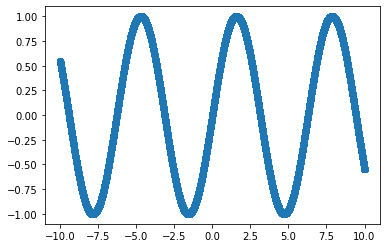

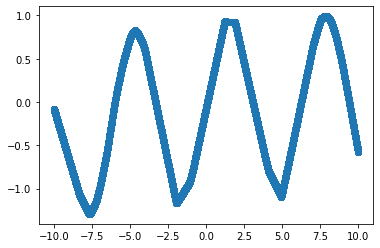

Mean Squared Error: 0.03314741199223279


In [13]:
# Continuous function
f_c = lambda x: np.sin(x)
f_c = np.vectorize(f_c)

x_c = np.random.uniform(low=-10, high=10, size=(100000,))[:,np.newaxis]
y_c = f_c(x_c)

# transform to [0~1] scale
scale_x = MinMaxScaler()
x_c = scale_x.fit_transform(x_c)
scale_y = MinMaxScaler()
y_c = scale_y.fit_transform(y_c)

neurons = 100
layers = 2
act_function = 'relu'

model = ANN_regresion(x_c, y_c, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
#  Predict Train Data
y_c_hat = model.predict(x_c)

# Transform to real scale
x_c = scale_x.inverse_transform(x_c)
y_c = scale_y.inverse_transform(y_c)
y_c_hat = scale_y.inverse_transform(y_c_hat)

# Plot functions
plt.scatter(x_c, y_c)
plt.show()
plt.scatter(x_c, y_c_hat)
plt.show()

print(f'Mean Squared Error: {mean_squared_error(y_c, y_c_hat)}')

## Discontinuous Function Example

(200000, 1)


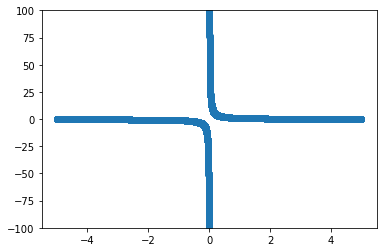

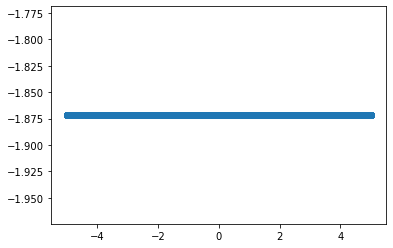

Mean Squared Error437649.7412916858


In [14]:
# Discontinuous function
# f_d = lambda x: x**2 if x <0 else 40 + 10*x
f_d = lambda x: 1 /(x)
f_d = np.vectorize(f_d)
x_d_1 = np.random.uniform(low=-5, high=-1e-17, size=(100000,))[:,np.newaxis]
x_d_2 = np.random.uniform(low=1e-17, high=5, size=(100000,))[:,np.newaxis]
x_d = np.concatenate((x_d_1, x_d_2), axis = 0)
print(x_d.shape)
y_d = f_d(x_d)

# transform to [0~1] scale
scale_x = MinMaxScaler()
x_d = scale_x.fit_transform(x_d)
scale_y = MinMaxScaler()
y_d = scale_y.fit_transform(y_d)

neurons = 10
layers = 100
act_function='relu'

model = ANN_regresion(x_d, y_d, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
# Predict Train Data
y_d_hat = model.predict(x_d)

# Transform to real scale
x_d = scale_x.inverse_transform(x_d)
y_d = scale_y.inverse_transform(y_d)
y_d_hat = scale_y.inverse_transform(y_d_hat)

# Plot functions
plt.scatter(x_d, y_d)
plt.ylim(-100,100)
plt.show()
plt.scatter(x_d, y_d_hat)
plt.show()
print(f'Mean Squared Error{mean_squared_error(y_d, y_d_hat)}')

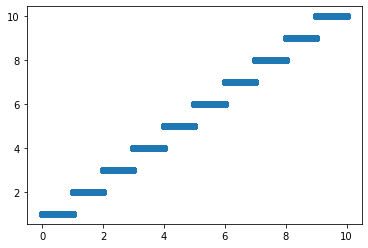

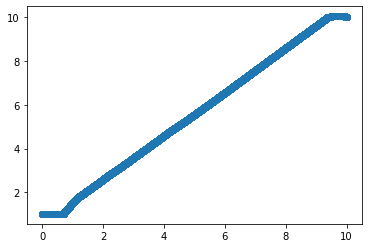

In [15]:
import math

math.ceil(0.1)
f_ceil = lambda x: math.ceil(x)
f_ceil = np.vectorize(f_ceil)
x = np.random.uniform(low=0, high=10, size=(100000,))[:,np.newaxis]
y = f_ceil(x)

scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

neurons = 10
layers = 10
act_function='relu'

model = ANN_regresion(x, y, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
# Predict Train Data
y_hat = model.predict(x)

# Transform to real scale
x = scale_x.inverse_transform(x)
y = scale_y.inverse_transform(y)
y_hat = scale_y.inverse_transform(y_hat)


plt.scatter(x,y)
plt.show()
plt.scatter(x,y_hat)
plt.show()

## Primer Dataset

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [10]:
import pandas as pd

df = pd.read_csv('high_diamond_ranked_10min.csv')
df = df.drop(['gameId','blueWardsDestroyed','blueFirstBlood','blueDragons','blueHeralds','blueTotalExperience','blueCSPerMin','redWardsPlaced','redWardsDestroyed','redFirstBlood','redDragons','redHeralds','redTotalExperience','redCSPerMin'],axis= 1)

In [18]:
df1 = df.loc[:, df.columns != 'blueWins']
df2 = df['blueWins']

df1.head()

,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,...,redAssists,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redGoldPerMin
0,28,9,6,11,0,0,17210,6.6,195,36,...,8,0,0,16567,6.8,197,55,-643,8,1656.7
1,12,5,5,5,0,0,14712,6.6,174,43,...,2,2,1,17620,6.8,240,52,2908,1173,1762.0
2,15,7,11,4,1,0,16113,6.4,186,46,...,14,0,0,17285,6.8,203,28,1172,1033,1728.5
3,43,4,5,5,1,0,15157,7.0,201,55,...,10,0,0,16478,7.0,235,47,1321,7,1647.8
4,75,6,6,6,0,0,16400,7.0,210,57,...,7,1,0,17404,7.0,225,67,1004,-230,1740.4


In [14]:
df1 = preprocessing.scale(df1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [22]:
model = Sequential()
model.add(Dense(22,input_shape=(25,), activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [23]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
history_dict=history.history

Epoch 00046: early stopping


In [24]:
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

1976/1976 [==============================] - 0s 20us/step
Test loss:  0.5318500650556464
Test accuracy:  0.7252024412155151


## Primer dataset variando el numero de capas 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
model = Sequential()
model.add(Dense(22,input_shape=(25,), activation = 'relu'))
capas = [4,8,12]
resultados = []
for j in range(0,len(capas)):
    for i in range(0,capas[j]):
        model.add(Dense(14,activation = 'relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
    history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
    loss, acc = model.evaluate(X_test, y_test)
    resultados.append((loss,acc))
    

Epoch 00052: early stopping
1976/1976 [==============================] - 0s 17us/step
Epoch 00024: early stopping
1976/1976 [==============================] - 0s 20us/step
Epoch 00044: early stopping
1976/1976 [==============================] - 0s 21us/step


In [34]:
tabla = pd.DataFrame(resultados, index =['4 capas', '8 capas', '12 capas'], columns = ['loss', 'acc'])
tabla

,loss,acc
4 capas,0.554342,0.726215
8 capas,0.693276,0.494939
12 capas,0.693152,0.494433


In [27]:
lista = [4,8,12]
for j in range(0,len(lista)):
    for i in range(0,lista[j]):
        print("hola")

hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


#### <a id="segundo"></a>
## 2. Challenge Kaggle

Pendiente

In [1]:
import numpy as np 
import pandas as pd
from PIL import Image
from os import listdir
from os.path import isfile, join
from keras.optimizers import Adam, SGD, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

dir = 'train_images'
extension='jpg'

paths = []
for f in listdir(dir):
    if isfile(join(dir,f)):
        path = join(dir,f)
        number = f.split('_')[1]
        number = int(number.split('.')[0])
        paths.append((number, path)) 
paths.sort(key= lambda file: file[0])

imgs = []
for _, path in paths:
    image = Image.open(path).convert("RGB")
    image=np.asarray(image)
    imgs.append(image)

X = np.array(imgs)/255.0
y = pd.read_csv('train_labels.csv')['Expected']


classes = np.unique(y)
n_classes = len(np.unique(y))
count = 0
labels ={}
for l in classes:
    labels[l] = count
    count+=1
y = np.array(y.replace(labels).tolist())
y = to_categorical(y,n_classes)

#Split train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
X_train = X
y_train = y

print(f'Cantidad de clases a predecir: {n_classes}')
print(f'Clases: {classes}')

Using TensorFlow backend.


Cantidad de clases a predecir: 10
Clases: ['altar' 'apse' 'bell_tower' 'column' 'dome_inner' 'dome_outer'
 'flying_buttress' 'gargoyle' 'stained_glass' 'vault']


In [2]:
N, width, height, depth = X_train.shape
N, width, height, depth

(9212, 128, 128, 3)

### VGG 19

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten

def create_cnn(classes, width, height, depth):
      
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(width, height, depth), activation='relu'))
    model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten()) 
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=1000, activation='relu'))
    #model.add(Dropout(0.5))

    if classes == 2:
        model.add(Dense(1))
        model.add(Activation('sigmoid'))
    else:
        model.add(Dense(classes, activation='softmax'))
    return model

CNN = create_cnn(n_classes, width, height, 3)
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 256)      

In [8]:
optimizer = Adam()
CNN.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
CNN.fit(X_train,y_train, epochs=25, batch_size=32, verbose=1)

Epoch 1/25
3168/9212 [=========>....................] - ETA: 1:16 - loss: 2.2439 - accuracy: 0.1695

KeyboardInterrupt: 

In [12]:
CNN.evaluate(X_test, y_test)

1843/1843 [==============================] - 1s 678us/step


[2.173364925306903, 0.647314190864563]

## Resnet 50

In [3]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True
                ):
    
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x
        
def resnet(input_shape, depth, num_classes):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [19]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.keras.backend.clear_session()

In [20]:
depth =  depth * 9 + 2
resnetModel = resnet((128, 128, 3), depth, n_classes)
resnetModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 16) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
optimizer = Adam()
resnetModel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
resnetModel.fit(X_train,y_train, epochs=25, batch_size=32, verbose=1)

Epoch 1/25


In [33]:
from keras.models import load_model
# resnetModel.save('1rst_resnet_80perc_traindata.h5')  # creates a HDF5 file 'my_model.h5'
resnetModel.save('2d_resnet_100perc_traindata.h5')
del resnetModel
# returns a compiled model
# identical to the previous one
# model = load_model('1rst_resnet_80perc_traindata.h5')

In [34]:
resnetModel.evaluate(X_test, y_test)

NameError: name 'resnetModel' is not defined

In [20]:
dir_test = 'test_images'
extension='jpg'

paths_test = []
# print(listdir(dir_test))
for f in listdir(dir_test):
    if isfile(join(dir_test,f)):
        path = join(dir_test,f)
        number = f.split('_')[1]
        number = int(number.split('.')[0])
        paths_test.append((number, path)) 
paths_test.sort(key= lambda file: file[0])

imgs_test = []
for _, path in paths_test:
    image_to_predict = Image.open(path).convert("RGB")
    image_to_predict=np.asarray(image_to_predict)
    imgs_test.append(image_to_predict)

X_kaggle= np.array(imgs_test)/255.0
X_kaggle.shape

(1023, 128, 128, 3)

In [25]:
y_kaggle = resnetModel.predict(X_kaggle)
y_kaggle = y_kaggle.argmax(axis=-1)

In [29]:
inv_labels = {v: k for k, v in labels.items()}

ids = [f'test_{i[0]}' for i in paths_test]

data_kaggle = pd.DataFrame({'Id': ids , 'Expected':y_kaggle})
data_kaggle['Expected'] = data_kaggle['Expected'].replace(inv_labels)
data_kaggle.to_csv('1rst_try.csv', index=False)